In [5]:
# -*- coding: utf-8 -*- #

# Write libraries here #########################################
import matplotlib.patches as pat
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
# from astroquery.gama import GAMA
from jupyterthemes import jtplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, cluster, preprocessing, mixture
from time import time
from tqdm import tnrange, tqdm_notebook
%matplotlib inline

import seaborn as sns; sns.set(style="ticks", color_codes=True)
# %matplotlib notebook
################################################################

# Showing 500 columns and rows #################################
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
################################################################

# NOT CHANGE (The PATH for directory) ##########################
CURRENT_DIR_NAME = os.path.dirname(os.path.abspath(__name__))
PATH_DATA = os.path.join(CURRENT_DIR_NAME, '../data/')
PATH_HIST = os.path.join(CURRENT_DIR_NAME, '../histogram/')
PATH_PLOT = os.path.join(CURRENT_DIR_NAME, '../plots/')
PATH_IMG = os.path.join(CURRENT_DIR_NAME, '../images/')
PATH_HTML = os.path.join(CURRENT_DIR_NAME, '../html/')
PATH_TEX = os.path.join(CURRENT_DIR_NAME, '../for_tex/')
################################################################

#When you make plots, jtplot is better.
jtplot.style(theme='grade3', context='notebook', fscale=3, spines=True, gridlines='--', ticks=False, grid=False)

In [6]:
completed_data = pd.read_pickle(PATH_DATA + 'GAMADataForManifold.pickle')

In [7]:
display(completed_data.describe())

,RA,DEC,FUV_flux,FUV_fluxerr,NUV_flux,NUV_fluxerr,u_flux,u_fluxerr,g_flux,g_fluxerr,r_flux,r_fluxerr,i_flux,i_fluxerr,z_flux,z_fluxerr,X_flux,X_fluxerr,Y_flux,Y_fluxerr,J_flux,J_fluxerr,H_flux,H_fluxerr,K_flux,K_fluxerr,W1_flux,W1_fluxerr,W2_flux,W2_fluxerr,W3_flux,W3_fluxerr,W4_flux,W4_fluxerr,P100_flux,P100_fluxerr,P160_flux,P160_fluxerr,S250_flux,S250_fluxerr,S350_flux,S350_fluxerr,S500_flux,S500_fluxerr,Z_TONRY,NQ,KCORR_FUV,KCORR_NUV,KCORR_U,KCORR_G,KCORR_R,KCORR_I,KCORR_Z,KCORR_Y,KCORR_J,KCORR_H,KCORR_K,PCOEFF_R_1,PCOEFF_R_2,PCOEFF_R_3,PCOEFF_R_4,PCOEFF_R_5,COEFFS_1,COEFFS_2,COEFFS_3,COEFFS_4,COEFFS_5,CHI2,MASS,INTSFH,METS,B300,B1000,FUV_flux_kcorrected,NUV_flux_kcorrected,H_flux_kcorrected,I_flux_kcorrected,K_flux_kcorrected,G_flux_kcorrected,Z_flux_kcorrected,Y_flux_kcorrected,J_flux_kcorrected,R_flux_kcorrected,U_flux_kcorrected,R-K,NUV-R
count,73768.000000,73768.000000,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,73768.000000,73768.000000,7.376800e+04,73768.000000,7.376800e+04,73768.000000,7.376800e+04,73768.000000,7.376800e+04,73768.000000,73768.000000,73768.000000,7.376800e+04,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,7.376800e+04,7.376800e+04,7.376800e+04,73768.000000,7.376800e+04,73768.000000,7.376800e+04,7.376800e+04,73768.000000,7.376800e+04,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000
mean,189.651980,0.375954,9.691125e-06,1.433836e-06,1.771798e-05,6.959949e-06,3.941530e-05,5.811074e-06,1.233047e-04,6.644793e-06,2.410331e-04,9.234676e-06,3.432591e-04,1.262331e-05,4.200821e-04,2.667000e-05,-4.725897,-4.726298,5.097796e-04,0.000035,6.000265e-04,0.000032,7.329608e-04,0.000037,7.477631e-04,0.000038,0.000396,0.000068,2.707400e-04,0.000066,0.000687,0.000141,0.001333,0.000921,-134.476986,-134.485920,-134.835816,-134.849297,-145.425209,-145.439338,-145.393815,-145.398589,-145.304460,-145.302563,0.200553,4.123956,0.253080,0.121602,0.428708,0.458146,0.203161,0.062516,0.070858,0.099476,-0.018801,0.004191,-0.330487,-0.001001,1.728377,-6.328902,12.690175,-4.808171,3.833503e-06,1.058281e-09,7.237552e-07,0.000009,1.680758e-07,2.194935,2.750862e+10,4.958471e+10,0.029632,1.950617e-02,0.265940,-17.261736,-18.144607,-22.214019,-21.465056,-21.983333,-20.628491,-21.685446,-21.919099,-21.973418,-21.216586,-19.327046,0.766747,3.071979
std,33.758608,1.356445,7.012375e-05,1.041517e-05,1.183519e-04,7.378952e-05,3.199671e-04,2.849965e-05,1.023210e-03,2.587866e-05,1.833359e-03,3.051119e-05,2.540001e-03,3.919699e-05,3.083389e-03,9.312436e-05,68.551593,68.551566,3.493307e-03,0.000169,4.066153e-03,0.000131,4.841449e-03,0.000115,4.133784e-03,0.000131,0.002416,0.000197,1.440871e-03,0.000228,0.006122,0.000378,0.011975,0.000886,341.008456,341.004835,341.402135,341.396708,352.354585,352.348732,352.309926,352.307952,352.212370,352.213152,0.102923,0.373316,0.526796,0.247942,0.360486,0.337047,0.145953,0.143677,0.107124,0.122149,0.091785,0.067802,0.125817,0.003224,0.682940,6.629421,18.311508,17.458761,2.259973e-05,5.150192e-09,2.927421e-06,0.000057,7.691974e-07,22.868611,4.735939e+10,8.489733e+10,0.007677,4.240422e-02,0.187483,1.608674,1.438503,1.445310,1.316428,1.461947,1.188454,1.354942,1.389135,1.407693,1.252013,1.195957,0.359255,1.280014
min,129.000109,-2.993768,3.332060e-10,5.765690e-09,9.628900e-10,3.340650e-08,1.335430e-08,2.499510e-07,4.235320e-08,1.292490e-07,1.538570e-08,1.932670e-07,3.210630e

In [138]:
# Select columns for classification and manifold learning
# X = completed_data[['Z_TONRY', 'FUV_flux_kcorrected', 'NUV_flux_kcorrected',
#                     'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
#                     'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

# Select columns for classification and manifold learning
X_ORIG = completed_data[['FUV_flux_kcorrected', 'NUV_flux_kcorrected',
                    'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
                    'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

In [121]:
X['FUV_flux_kcorrected'] = 10**(-0.4*completed_data['FUV_flux_kcorrected']) 
X['NUV_flux_kcorrected'] = 10**(-0.4*completed_data['NUV_flux_kcorrected'])
X['U_flux_kcorrected'] = 10**(-0.4*completed_data['U_flux_kcorrected'])
X['G_flux_kcorrected'] = 10**(-0.4*completed_data['G_flux_kcorrected'])
X['R_flux_kcorrected'] = 10**(-0.4*completed_data['R_flux_kcorrected'])
X['I_flux_kcorrected'] = 10**(-0.4*completed_data['I_flux_kcorrected'])
X['Z_flux_kcorrected'] = 10**(-0.4*completed_data['Z_flux_kcorrected'])
X['Y_flux_kcorrected'] = 10**(-0.4*completed_data['Y_flux_kcorrected'])
X['J_flux_kcorrected'] = 10**(-0.4*completed_data['J_flux_kcorrected'])
X['H_flux_kcorrected'] = 10**(-0.4*completed_data['H_flux_kcorrected'])
X['K_flux_kcorrected'] = 10**(-0.4*completed_data['K_flux_kcorrected'])

# X['FUV_flux_kcorrected'] = 10**(-0.4*completed_data['FUV_flux_kcorrected'] - 8) 
# X['NUV_flux_kcorrected'] = 10**(-0.4*completed_data['NUV_flux_kcorrected'] - 8)
# X['U_flux_kcorrected'] = 10**(-0.4*completed_data['U_flux_kcorrected'] - 8)
# X['G_flux_kcorrected'] = 10**(-0.4*completed_data['G_flux_kcorrected'] - 8)
# X['R_flux_kcorrected'] = 10**(-0.4*completed_data['R_flux_kcorrected'] - 8)
# X['I_flux_kcorrected'] = 10**(-0.4*completed_data['I_flux_kcorrected'] - 8)
# X['Z_flux_kcorrected'] = 10**(-0.4*completed_data['Z_flux_kcorrected'] - 8)
# X['Y_flux_kcorrected'] = 10**(-0.4*completed_data['Y_flux_kcorrected'] - 8)
# X['J_flux_kcorrected'] = 10**(-0.4*completed_data['J_flux_kcorrected'] - 8)
# X['H_flux_kcorrected'] = 10**(-0.4*completed_data['H_flux_kcorrected'] - 8)
# X['K_flux_kcorrected'] = 10**(-0.4*completed_data['K_flux_kcorrected'] - 8)

X.describe()

,FUV_flux_kcorrected,NUV_flux_kcorrected,U_flux_kcorrected,G_flux_kcorrected,R_flux_kcorrected,I_flux_kcorrected,Z_flux_kcorrected,Y_flux_kcorrected,J_flux_kcorrected,H_flux_kcorrected,K_flux_kcorrected
count,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04
mean,2.081628e+07,3.758485e+07,9.010443e+07,2.865406e+08,5.131511e+08,6.778806e+08,8.481946e+08,1.073257e+09,1.140979e+09,1.450725e+09,1.187162e+09
std,5.475742e+07,5.997648e+07,1.030344e+08,2.770476e+08,5.141845e+08,7.189743e+08,9.085164e+08,1.153962e+09,1.233028e+09,1.562393e+09,1.284731e+09
min,1.022473e+04,1.071926e+04,1.000325e+06,1.065123e+06,1.548270e+06,1.785360e+06,1.535870e+06,2.059243e+06,1.926780e+06,1.165937e+06,1.053804e+06
25%,3.364691e+06,8.101877e+06,2.780294e+07,9.526674e+07,1.597425e+08,1.919149e+08,2.340264e+08,2.856872e+08,2.973306e+08,3.674820e+08,2.936555e+08
50%,9.456531e+06,2.059682e+07,5.991157e+07,2.072065e+08,3.618585e+08,4.609121e+08,5.754090e+08,7.232641e+08,7.670558e+08,9.739678e+08,7.920212e+08
75%,2.184441e+07,4.608189e+07,1.161460e+08,3.876985e+08,6.952563e+08,9.173868e+08,1.150755e+09,1.466162e+09,1.563376e+09,2.003826e+09,1.642590e+09
max,2.504305e+09,2.347346e+09,2.505986e+09,2.509593e+09,7.030845e+09,1.227742e+10,1.931126e+10,2.023228e+10,1.873512e+10,2.297857e+10,2.024305e+10


In [143]:
# X_diff = pd.DataFrame({'FUV-NUV':test_data[:,0],
                       
x_diff = []

orig_data = np.array(X_ORIG)#[:100,:]
i=0
j=1

p = 0
while i<11:
    while j <11:
        diff = orig_data[:,i] - orig_data[:,j]
        x_diff.append(diff)
#         print(i,j)
        p += 1
        
        j+=1
    i += 1
    j = i+1
    
print(f"p={p}")
x_diff = np.array(x_diff)
X_DIFF = pd.DataFrame(x_diff.T)
X_DIFF.describe()

p=55


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
count,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000,73768.000000
mean,0.882871,2.065310,3.366755,3.954850,4.203319,4.423710,4.657363,4.711682,4.952283,4.721597,1.182439,2.483884,3.071979,3.320448,3.540839,3.774492,3.828811,4.069412,3.838726,1.301445,1.889540,2.138010,2.358400,2.592053,2.646372,2.886973,2.656287,0.588095,0.836564,1.056955,1.290608,1.344927,1.585528,1.354842,0.248469,0.468860,0.702512,0.756832,0.997432,0.766747,0.220390,0.454043,0.508362,0.748963,0.518278,0.233653,0.287972,0.528573,0.297887,0.054319,0.294920,0.064235,0.240601,0.009915,-0.230686
std,0.995514,1.361603,1.447497,1.558758,1.635473,1.679660,1.712884,1.729092,1.767449,1.768675,1.033877,1.158971,1.280014,1.360335,1.409895,1.445769,1.463245,1.504924,1.505138,0.547913,0.643531,0.723282,0.780430,0.811535,0.832902,0.878915,0.884603,0.172508,0.280614,0.363481,0.393364,0.422038,0.485818,0.494625,0.128785,0.225482,0.243735,0.276167,0.350396,0.359255,0.159317,0.158098,0.191350,0.276239,0.283627,0.157525,0.176588,0.251877,0.255389,0.090696,0.185457,0.180701,0.156530,0.143496,0.164572
min,-9.111224,-5.804138,-5.965029,-7.268533,-6.942234,-6.837052,-5.921695,-3.637670,-3.478928,-3.737771,-4.718561,-3.834861,-2.575391,-2.327989,-2.728525,-2.446400,-3.504638,-3.005930,-4.191618,-3.000651,-4.304155,-3.977856,-3.872674,-2.957317,-4.008833,-2.950851,-3.973851,-1.303503,-2.166429,-3.526895,-3.381023,-4.103907,-3.709467,-5.088916,-1.940312,-3.813825,-3.558292,-4.173092,-4.288894,-5.543778,-4.097666,-3.710759,-4.037228,-4.839869,-5.855722,-4.421171,-5.038765,-4.461581,-6.068881,-3.398492,-4.617328,-6.276434,-4.619629,-6.100928,-5.577104
25%,0.396928,1.207778,2.327079,2.812168,2.994479,3.190524,3.389938,3.433777,3.652055,3.414967,0.584734,1.683730,2.162414,2.341424,2.533181,2.730013,2.767247,2.984861,2.747701,0.973441,1.463547,1.642604,1.832842,2.030682,2.068361,2.283446,2.050288,0.465404,0.636640,0.822406,1.018051,1.056109,1.272009,1.032592,0.168574,0.349983,0.547213,0.583382,0.797449,0.557278,0.162724,0.368595,0.406428,0.617748,0.377190,0.161523,0.205460,0.415776,0.174714,0.015310,0.227452,-0.015575,0.191090,-0.048636,-0.277942
50%,0.747496,1.842982,3.070787,3.663646,3.927112,4.171996,4.413001,4.479980,4.735457,4.507436,1.000400,2.196345,2.790871,3.058134,3.300425,3.545301,3.610397,3.865422,3.639255,1.192820,1.789046,2.056858,2.306853,2.546478,2.614102,2.871181,2.645595,0.594673,0.864066,1.105454,1.347605,1.413779,1.668792,1.441173,0.267349,0.508273,0.750335,0.811741,1.065096,0.833667,0.243057,0.482086,0.541102,0.792322,0.559671,0.242028,0.303972,0.554234,0.319848,0.057402,0.306495,0.071851,0.250419,0.018207,-0.228720
75%,1.271850,2.756030,4.168403,4.868629,5.193147,5.460195,5.727149,5.800215,6.075255,5.857913,1.586113,2.996622,3.708544,4.045664,4.320242,4.592840,4.672033,4.954731,4.734458,1.503832,2.204037,2.534481,2.813697,3.077378,3.152568,3.431728,3.205811,0.717107,1.051936,1.326576,1.594509,1.662912,1.938613,1.709687,0.338102,0.619601,0.881355,0.950224,1.225209,0.999780,0.304122,0.557421,0.626654,0.904408,0.679040,0.309230,0.379881,0.657111,0.433029,0.099066,0.372259,0.150296,0.299907,0.077829,-0.176669
max,9.457386,10.733571,11.970005,13.045792,13.403488,13.565696,13.8

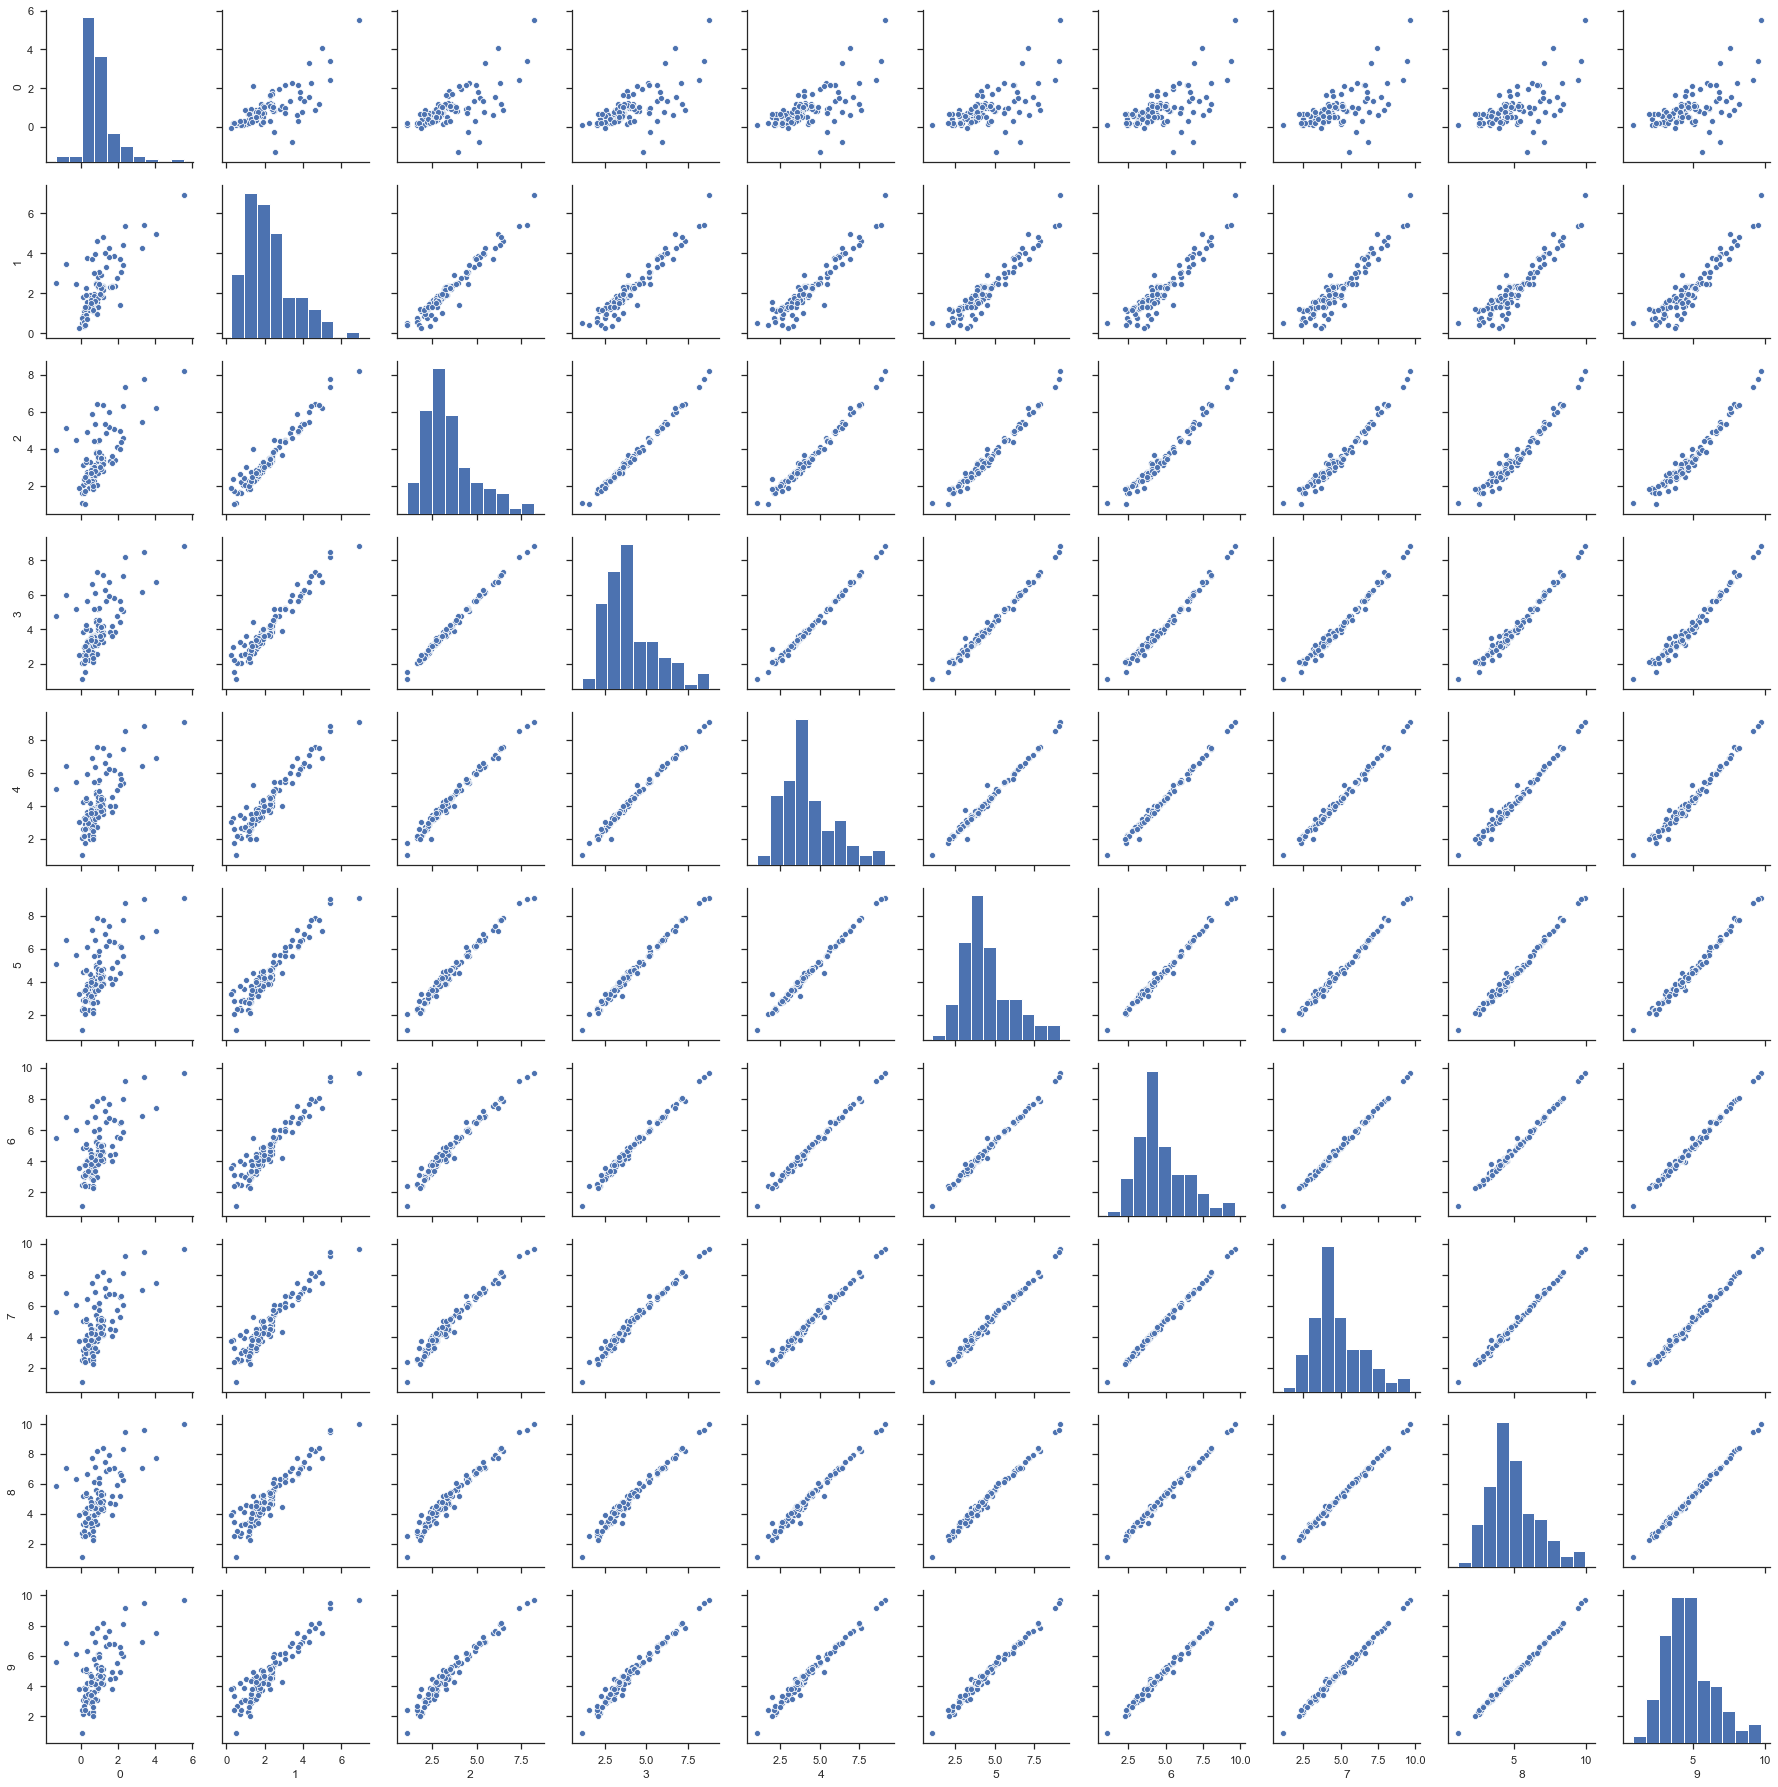

In [149]:
# pd.DataFrame(np.array(X_DIFF)[:500,:10]).describe()
sns.pairplot(pd.DataFrame(np.array(X_DIFF)[:500,:10]))

In [103]:
DATA_GAMA_FLUX = completed_data
X = X.copy()

# X_norm = X
# X.describe()

In [123]:
# X = data_for_manifoldlearning

# RobustScaler uses [0.25, 0.75] samples
sc=preprocessing.RobustScaler(quantile_range=(25, 75))#StandardScaler()
# sc=preprocessing.StandardScaler(with_mean=True, with_std=False)
# sc=preprocessing.RobustScaler()
sc.fit(X)
X_norm=sc.transform(X)

x=X_norm[:,0]
y=X_norm[:,1]

# print(X_norm)

pd.DataFrame(X_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,7.376800e+04,73768.000000,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,7.376800e+04,73768.000000,7.376800e+04,7.376800e+04
mean,6.147143e-01,0.447289,3.417682e-01,2.712908e-01,2.825186e-01,2.990721e-01,2.975643e-01,2.964850e-01,0.295348,2.913552e-01,2.929279e-01
std,2.963108e+00,1.579159,1.166298e+00,9.473923e-01,9.601703e-01,9.910435e-01,9.910423e-01,9.775405e-01,0.973921,9.548072e-01,9.524046e-01
min,-5.111714e-01,-0.542025,-6.668461e-01,-7.049215e-01,-6.728309e-01,-6.328663e-01,-6.260014e-01,-6.109445e-01,-0.604345,-5.944972e-01,-5.863647e-01
25%,-3.296499e-01,-0.328987,-3.634538e-01,-3.827895e-01,-3.774245e-01,-3.707893e-01,-3.723924e-01,-3.706786e-01,-0.371018,-3.706346e-01,-3.694515e-01
50%,5.039698e-17,0.000000,4.216826e-17,-5.095623e-17,-5.565176e-17,4.108110e-17,6.501910e-17,5.049206e-17,0.000000,-3.642580e-17,4.418653e-17
75%,6.703501e-01,0.671013,6.365462e-01,6.172105e-01,6.225755e-01,6.292107e-01,6.276076e-01,6.293214e-01,0.628982,6.293654e-01,6.305485e-01
max,1.350046e+02,61.262476,2.768835e+01,7.873242e+00,1.245343e+01,1.628803e+01,2.043774e+01,1.652640e+01,14.192270,1.344742e+01,1.441956e+01


In [ ]:
np.arange()

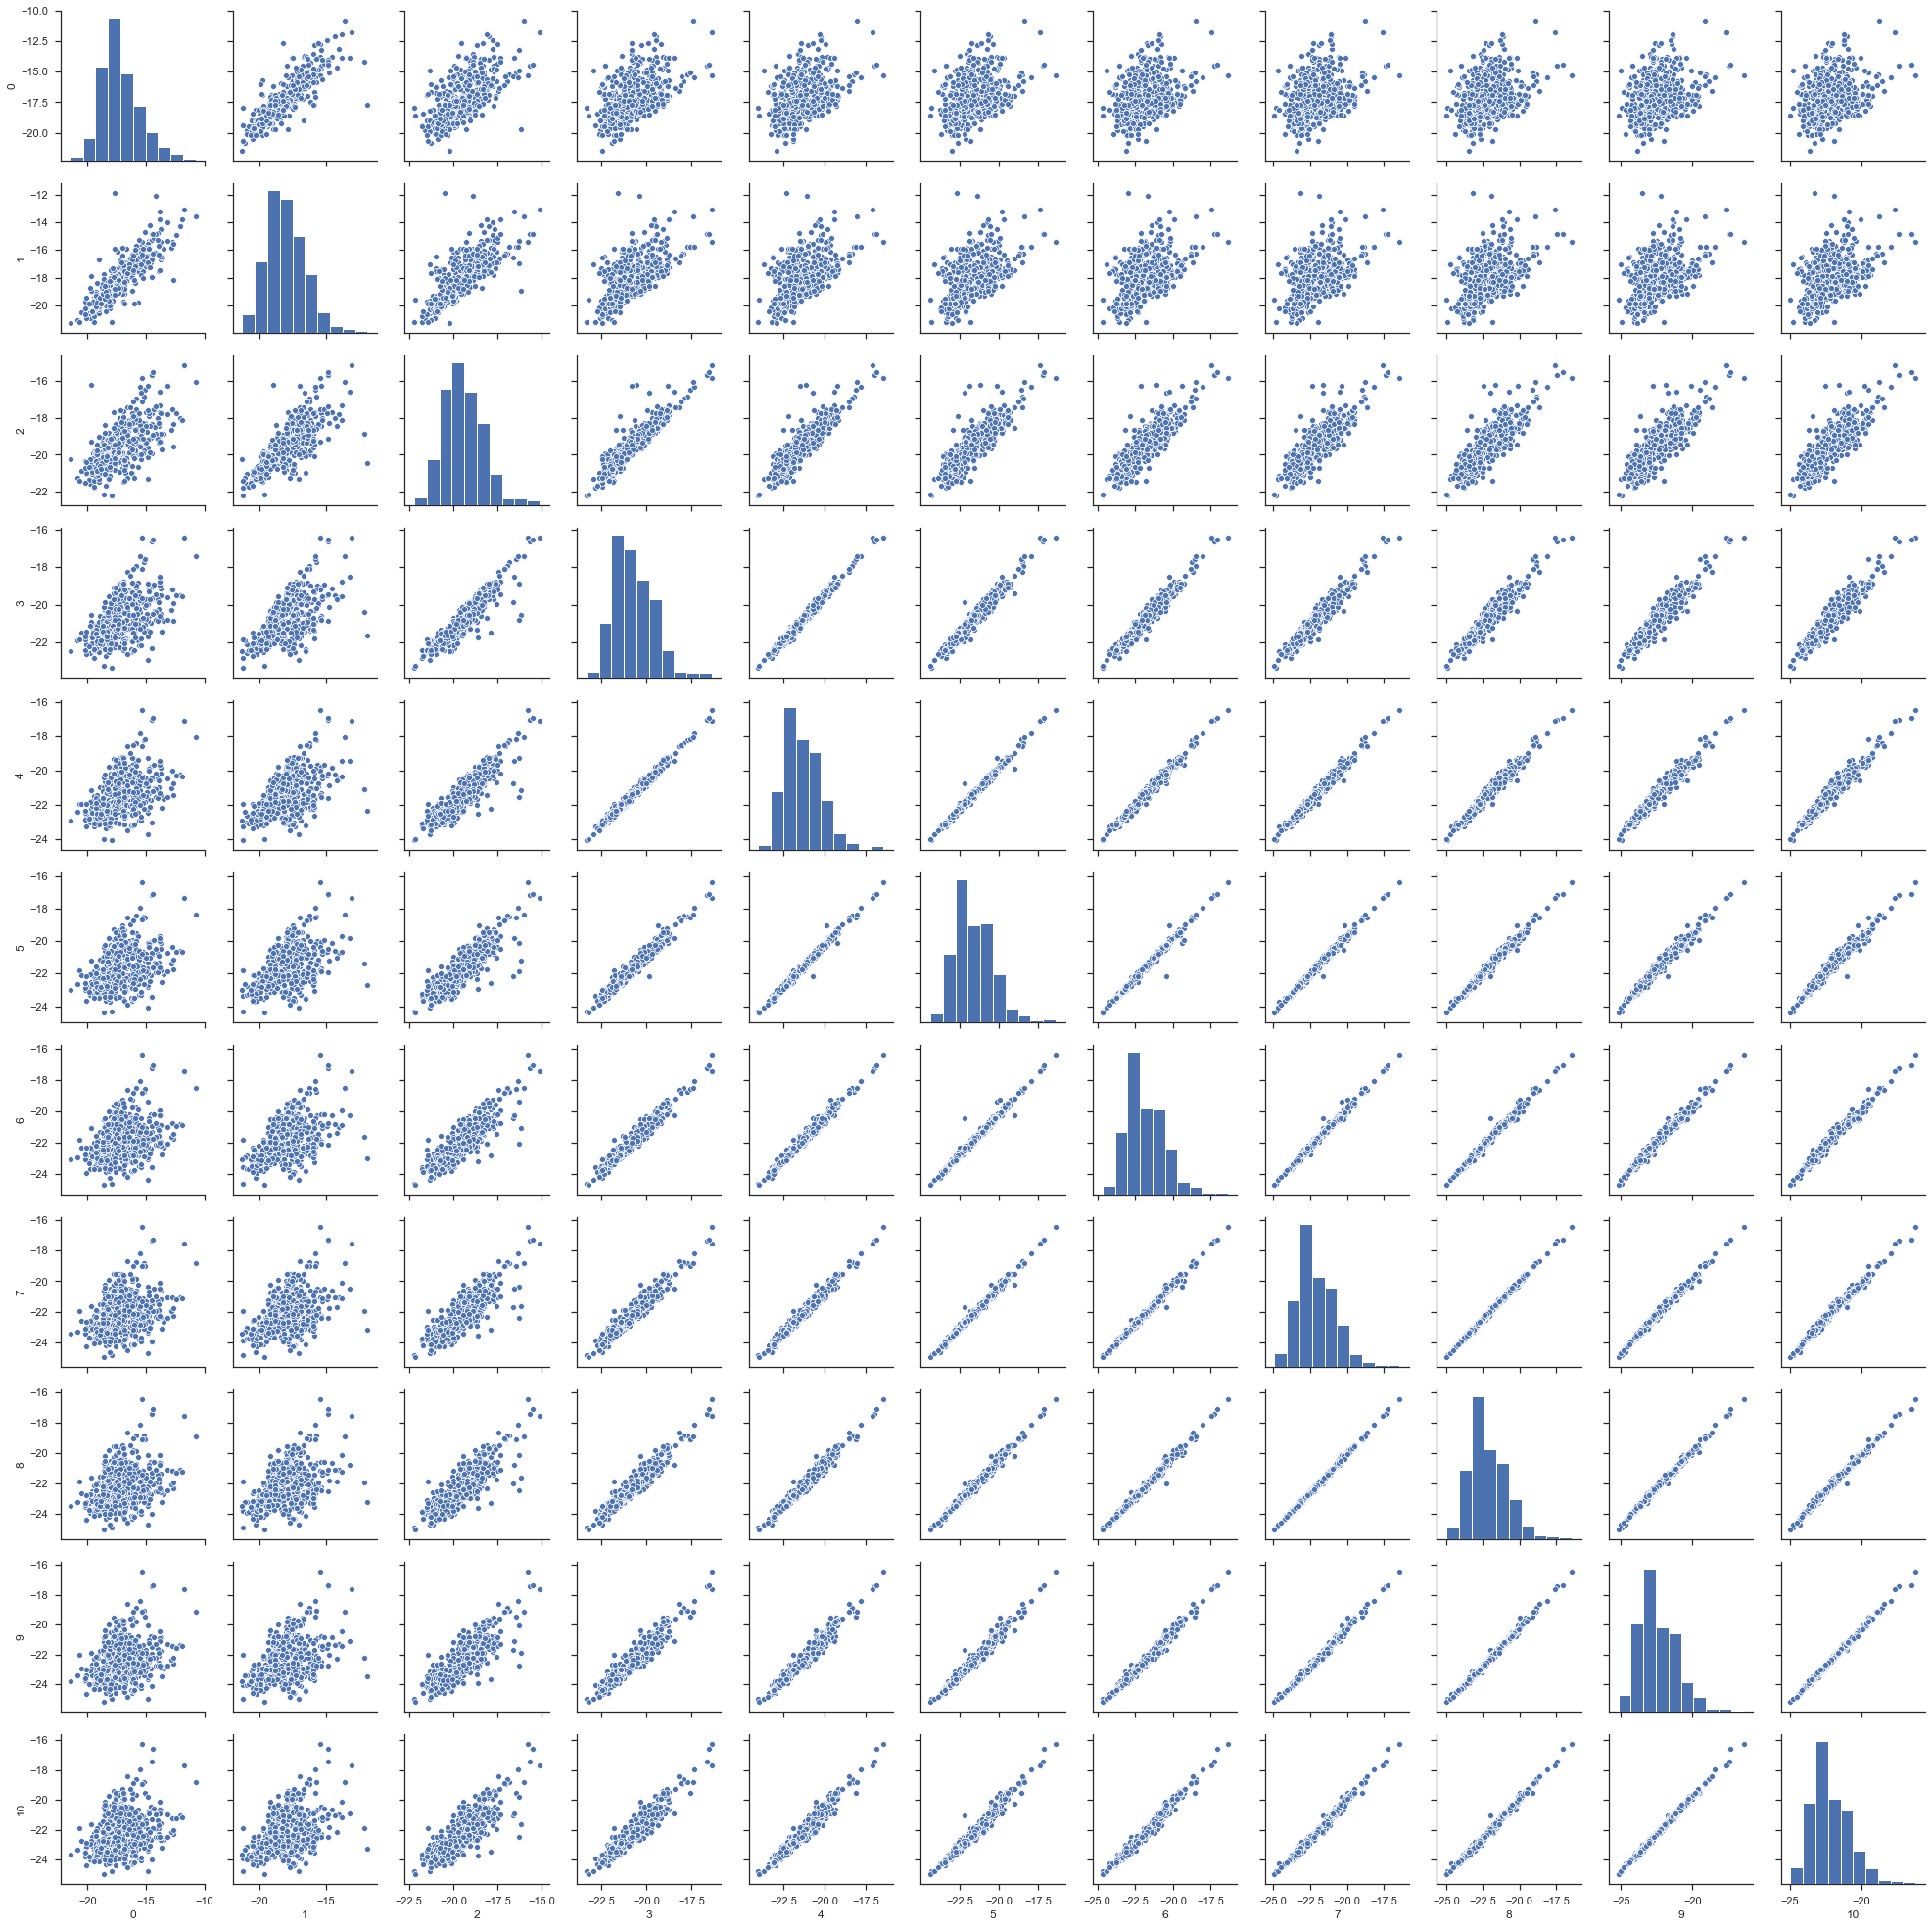

In [150]:
sns.pairplot(pd.DataFrame(np.array(X)[:500,:]))

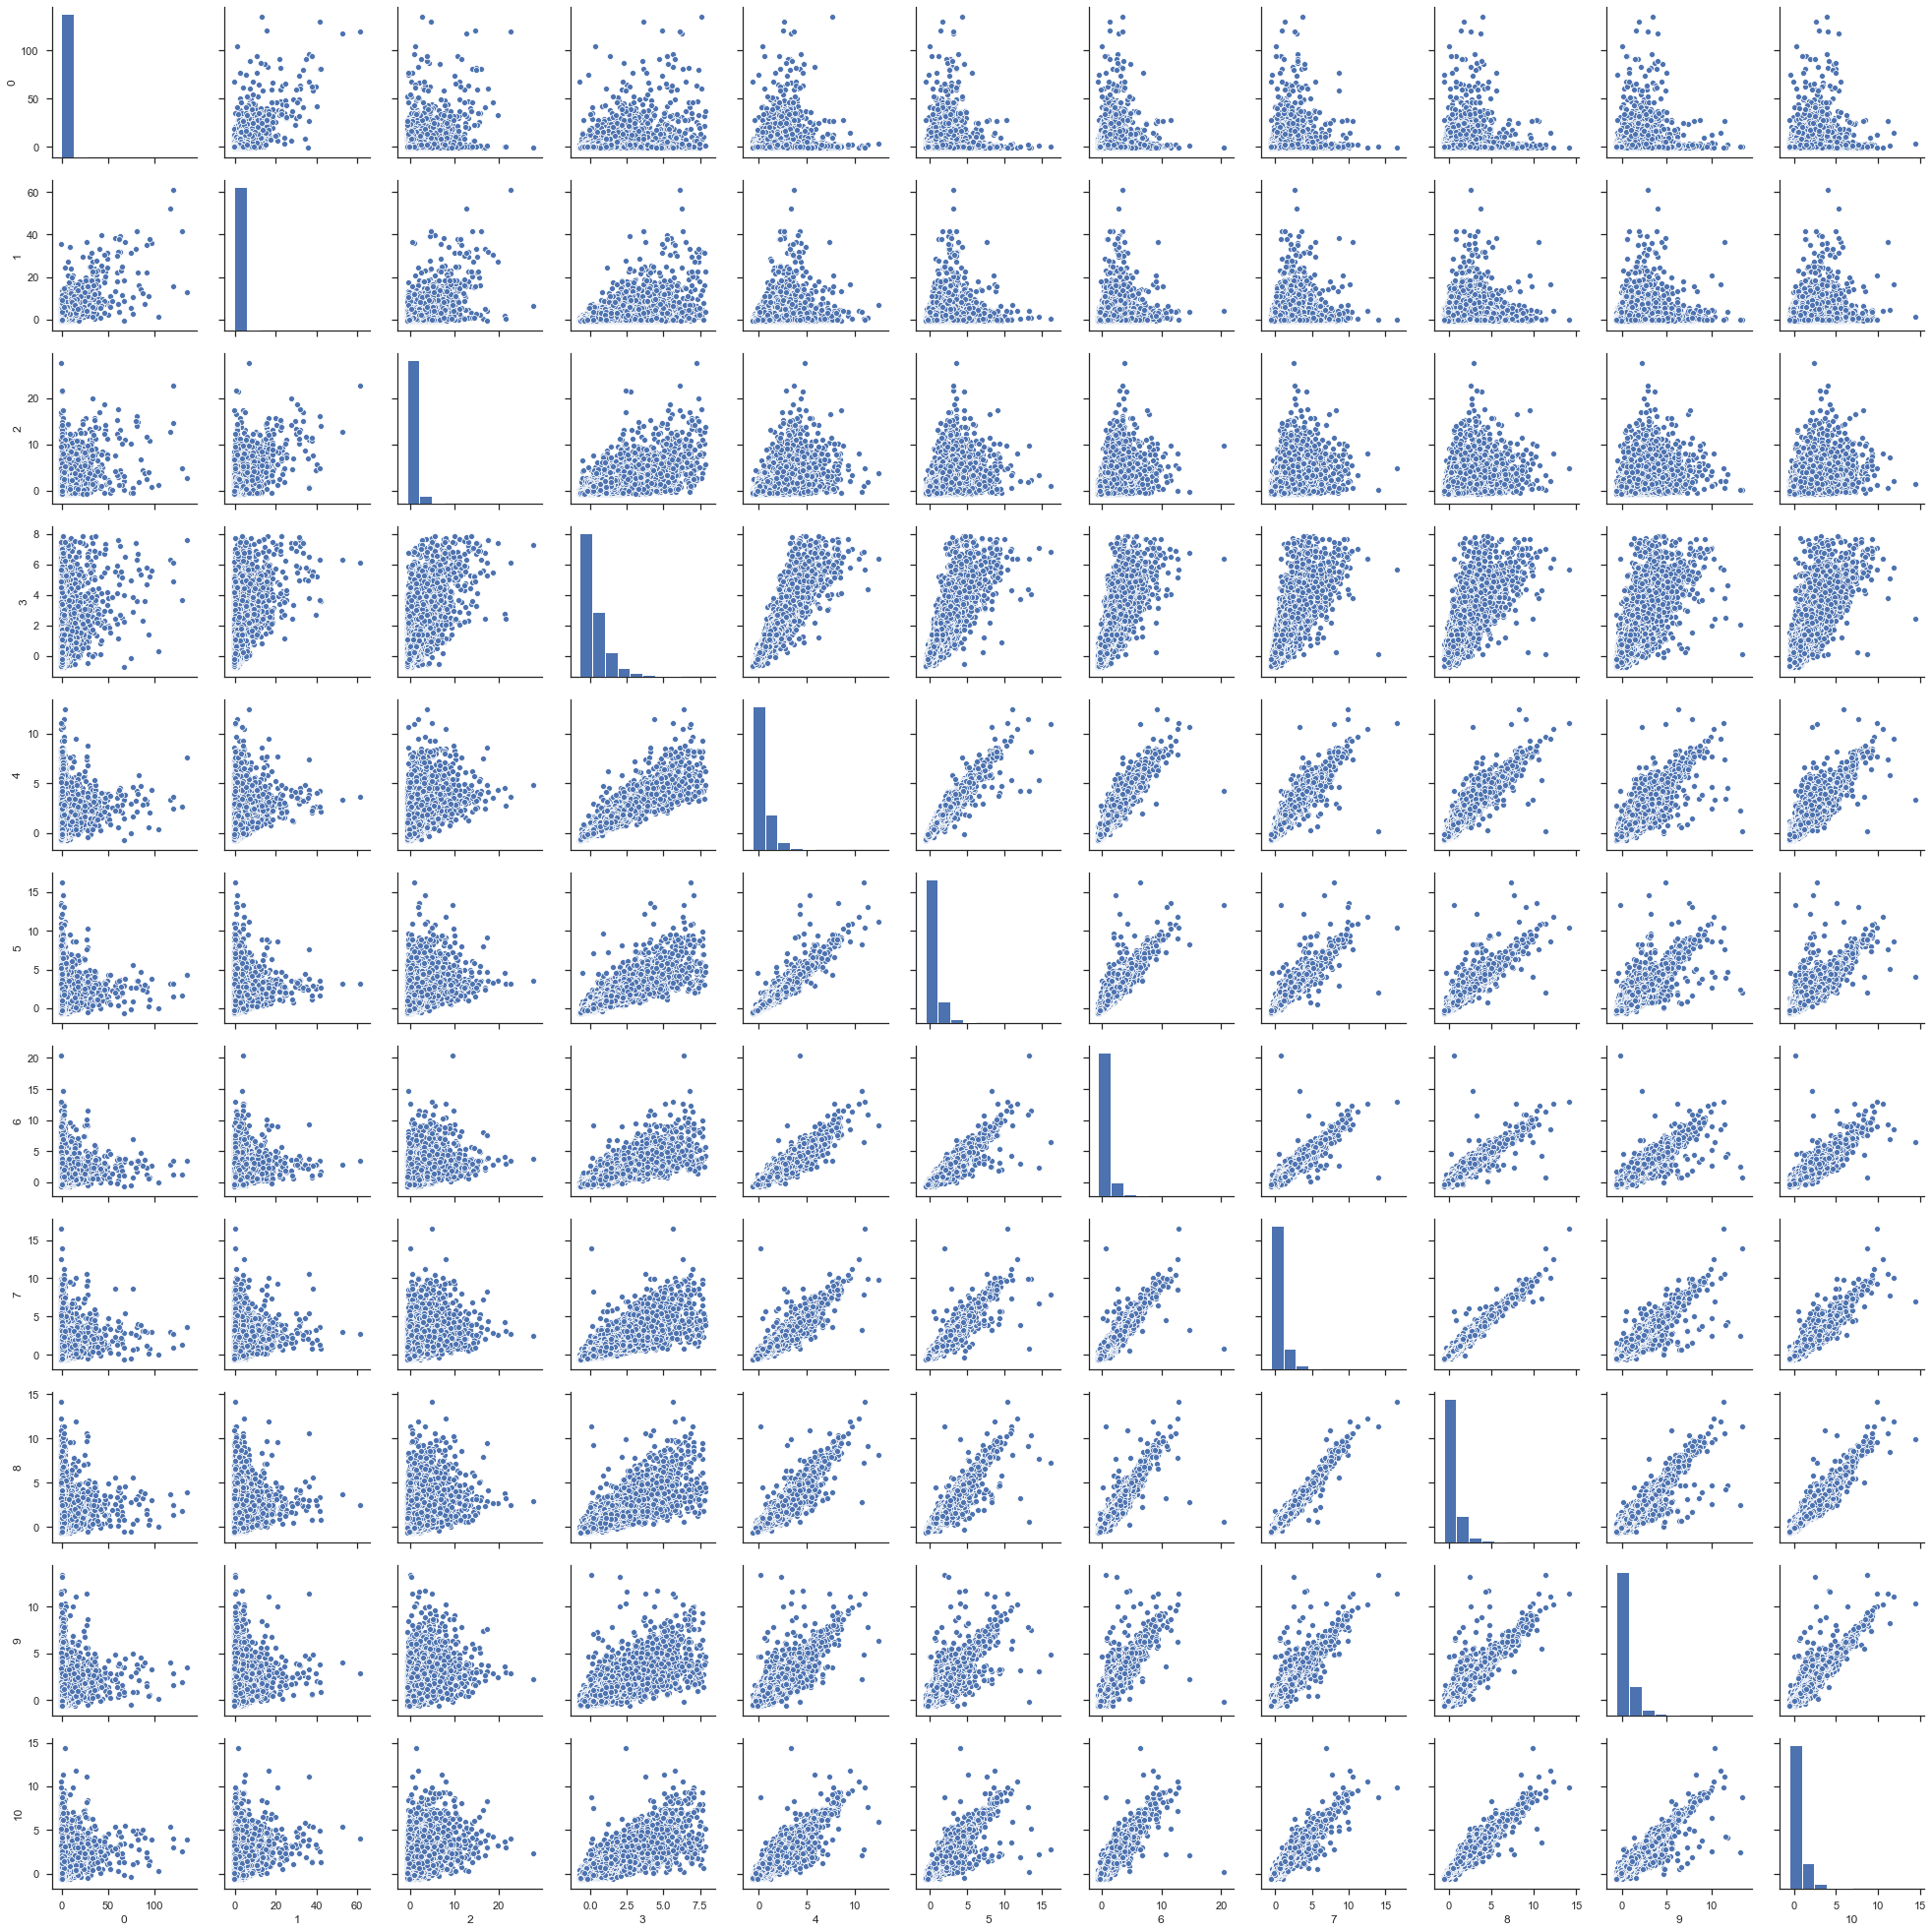

In [124]:
sns.pairplot(pd.DataFrame(X_norm))

/home/suchetha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


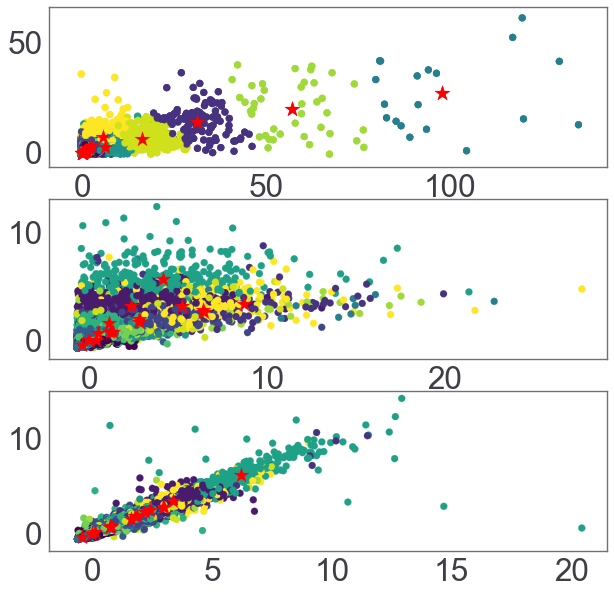

In [116]:
N_COMP = 15

plt.figure(figsize=(10,10))
# x=X_norm[:,0]
# y=X_norm[:,1]

#Execute the K-means
km=cluster.KMeans(n_clusters=N_COMP)
z_km=km.fit(X_norm)

# Plot the K-means result
plt.subplot(311)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')

# Plot the K-means result
plt.subplot(311)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')

# Plot the K-means result
plt.subplot(312)
plt.scatter(X_norm[:,2],X_norm[:,4], c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,2],z_km.cluster_centers_[:,4],s=250, marker='*',c='red')

# Plot the K-means result
plt.subplot(313)
plt.scatter(X_norm[:,6],X_norm[:,8], c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,6],z_km.cluster_centers_[:,8],s=250, marker='*',c='red')

# # Execute the VBGMM
# vbgm = mixture.BayesianGaussianMixture(n_components=N_COMP, covariance_type='full', max_iter=1000, verbose=1)
# vbgm=vbgm.fit(X_norm)
# labels=vbgm.predict(X_norm)

# # Plot the VBGMM result
# plt.subplot(312)
# plt.scatter(x,y, c=labels)

# # Plot the probability distribution calculated by VBGMM
# #print(vbgm.weights_)
# plt.subplot(313)
# x_tick =np.linspace(start = 1, stop = N_COMP, num = N_COMP)#np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
# plt.bar(x_tick, vbgm.weights_, width=0.7, tick_label=x_tick)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
  Iteration 160
  Iteration 170
  Iteration 180
  Iteration 190
  Iteration 200
  Iteration 210
  Iteration 220
  Iteration 230
  Iteration 240
  Iteration 250
  Iteration 260
  Iteration 270
  Iteration 280
  Iteration 290
  Iteration 300
  Iteration 310
  Iteration 320
  Iteration 330
  Iteration 340
  Iteration 350
  Iteration 360
  Iteration 370
  Iteration 380
  Iteration 390
Initialization converged: True


<BarContainer object of 15 artists>

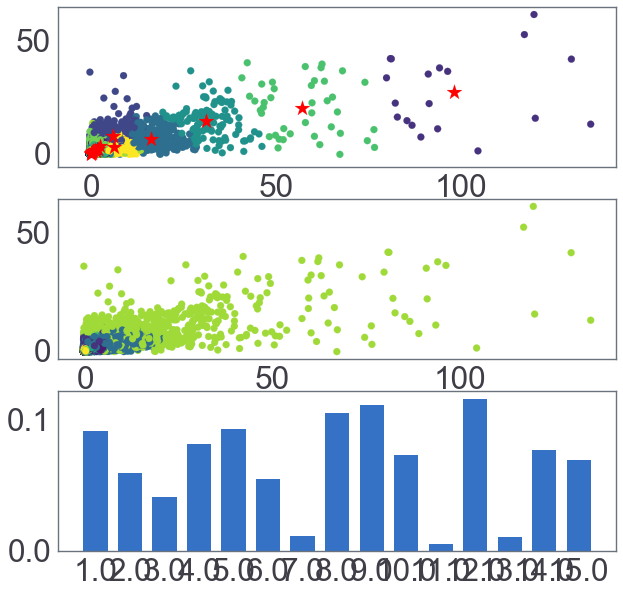

In [113]:
N_COMP = 15

plt.figure(figsize=(10,10))
# x=X_norm[:,0]
# y=X_norm[:,1]

#Execute the K-means
km=cluster.KMeans(n_clusters=N_COMP)
z_km=km.fit(X_norm)

# Plot the K-means result
plt.subplot(311)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')

# Execute the VBGMM
vbgm = mixture.BayesianGaussianMixture(n_components=N_COMP, covariance_type='full', max_iter=1000, verbose=1)
vbgm=vbgm.fit(X_norm)
labels=vbgm.predict(X_norm)

# Plot the VBGMM result
plt.subplot(312)
plt.scatter(x,y, c=labels)

# Plot the probability distribution calculated by VBGMM
#print(vbgm.weights_)
plt.subplot(313)
x_tick =np.linspace(start = 1, stop = N_COMP, num = N_COMP)#np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.bar(x_tick, vbgm.weights_, width=0.7, tick_label=x_tick)

In [110]:
# Add the label from VBGMM to the original pd.DataFrame
data_for_manifoldlearning_plus_label = X.join(pd.DataFrame(labels, index=X.index, columns=['label']))
DATA_GAMA_FLUX = DATA_GAMA_FLUX.join(pd.DataFrame(labels, index=X.index, columns=['label']))

ValueError: columns overlap but no suffix specified: Index(['label'], dtype='object')

In [ ]:
# Show the color-color plot with labels (each number on the plot shows the label number)

plt.figure(figsize=(16, 9))
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=14)
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])

for i in tnrange(15):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'NUV-R'])
    print('label:%s, center_point=(%s, %s)'%(i, x_mean, y_mean))
    print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])))
    plt.text(x_mean, y_mean, '$%s$'%(i), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])/200, color=plt.cm.Spectral(i/14))
    

In [ ]:
#  Color-color plot with colorbars based on redshift
plt.figure(figsize=(32, 36))
for i in tnrange(6):
    if i <= 4:
        plt.subplot(421 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i) & (DATA_GAMA_FLUX['Z_TONRY'] < (0.1 * i) + 0.1)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=14)
        plt.xlabel('r-K')
        plt.xlim([-1, 2.5])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$ < %s]'%('{:.1f}'.format((0.1 * i)), '{:.1f}'.format((0.1 * i) + 0.1)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/14))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/14))
    else:
        plt.subplot(421 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=14)
        plt.xlabel('r-K')
        plt.xlim([-1, 2.5])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$]'%('{:.1f}'.format(0.1 * i)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/14))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/14))
plt.subplot(427)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=14)
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])
plt.title('Color-color plot for all samples')
for j in range(15):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
    #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
    if not np.isnan(x_mean):
        plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/14))
        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/14))
plt.tight_layout()